# start

In [11]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [12]:
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()

In [13]:
y_train = y_train.reshape(-1, )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [14]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", " "]

In [15]:
def plot_sample(x, y, index):
    plt.figure(figsize= (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

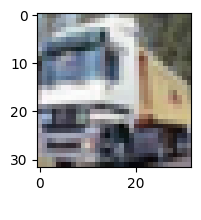

In [16]:
plot_sample(x_train,y_train,1)

- Why do we need normalize the data?

In [17]:
x_train = x_train / 255
x_test = x_test / 255

In [18]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy', ## if the y is an array like [0 0 0 0 0 0 0 0 0 1 0], then use `categorical_crossentropy'
              metrics=['accuracy']) 

ann.fit(x_train, y_train, epochs=5)

/Users/wangyixun/PycharmProjects/AI_project1/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 59ms/step - accuracy: 0.3026 - loss: 1.9353
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 58ms/step - accuracy: 0.4173 - loss: 1.6501
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 60ms/step - accuracy: 0.4533 - loss: 1.5508
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 61ms/step - accuracy: 0.4740 - loss: 1.4926
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 67ms/step - accuracy: 0.4949 - loss: 1.4331
